# `violin` summary plot

This notebook is designed to demonstrate (and so document) how to use the `shap.plots.violin` function. 

It uses an XGBoost model trained on the toy diabetes dataset provided by the scikit-learn library (source URL: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

see for more info : https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset.

In [1]:
import xgboost

import shap

# train xgboost model on diabetes data:
X, y = shap.datasets.diabetes()
bst = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's prediction using SHAP values
shap_values = shap.TreeExplainer(bst)(X)

type(shap_values)

shap._explanation.Explanation

## A simple violin summary plot

The violin summary plot offers a compact representation of the distribution and variability of SHAP values for each feature. Individual violin plots are stacked by importance of the particular feature on model output (sum of the absolute values of the SHAP values per feature). 

Violin plots use "violin-shaped" figures to display the distribution and density of SHAP values for their respective feature. The violins can therefore provide insights into the range, variability, skewness, symmetry, and multimodality of the SHAP value distribution for a specific feature.

The overall violin summary plot allow for comparisons in feature importance. Wider violins indicate higher density and more frequent values, thus providing insights into the relative importance of each feature with regard to the model output.

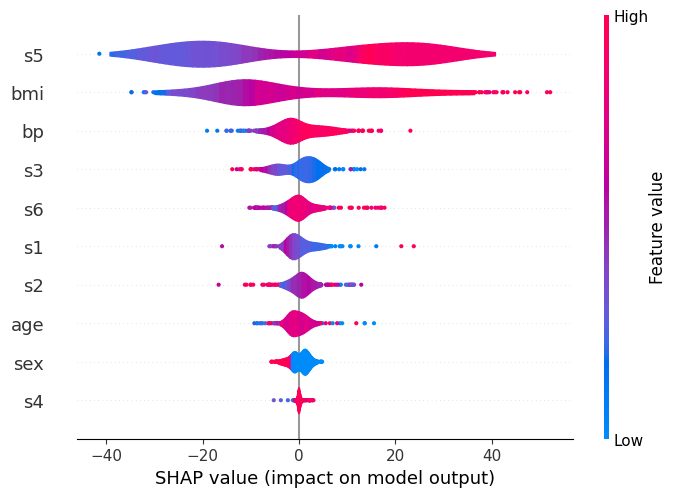

In [2]:
shap.plots.violin(shap_values)

There are 10 features available in the diabetes dataset.

By default the maximum number of features shown by `shap.plots.violin` is 20. 

The number of features displayed by the violin summary plot can be adjusted with the `max_display` parameter :

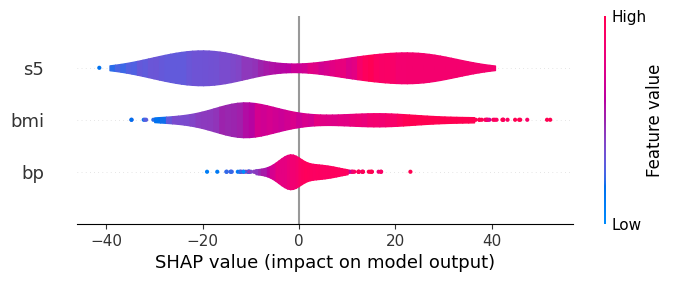

In [3]:
shap.plots.violin(shap_values, max_display=3)

## The layered Violin Summary Plot

There are currently two supported violin plot types: 'violin' and 'layered_violin'. You can control this via the `plot_type` parameter. 

The layered violin summary plot is identical to the violin one, except that outliers are not drawn as scatter points.

Let us take the diabetes example :

We want to plot a layered violin summary plot based the computed shap_values object.

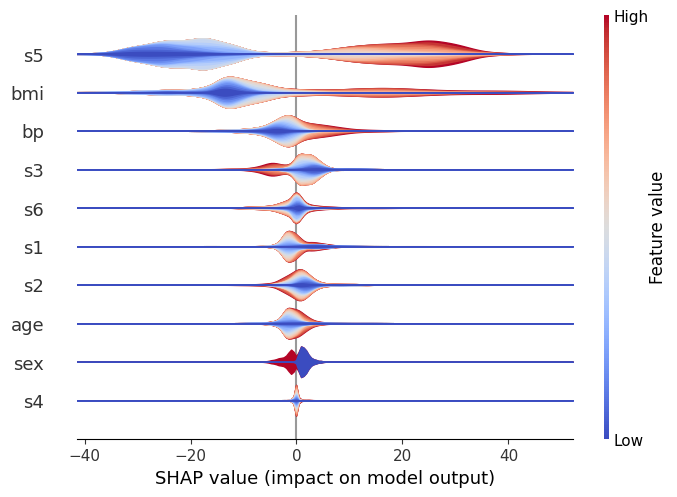

In [4]:
shap.plots.violin(shap_values, plot_type="layered_violin")

We can see in this case, similarly to the standard violin, that `s5` is the most important variable, and generally it causes either a large positive or negative change in the prediction. 

However, we can now also get get a sense of the direction of the impact from the data. Red represents large values of a variable, and blue represents small ones, for the considered feature.

Therefore, it becomes visible that large values of `s5` for instance increase the prediction, and vice versa. We can also see that other features (like `s6`) are pretty evenly split, which indicates that while overall they’re still important, their interaction is dependent on other variables. (After all, the whole point of a tree model like xgboost is to capture these interactions, so we can’t expect to see everything in a single dimension!)

## Plot Size

Finally, using the `plot_size` parameter, you can control the size of the summary plot. By default the size is auto-scaled based on the number of features that are being displayed. 

Passing a single float will cause each row to be that many inches high. 

Passing a pair of floats will scale the plot by that number of inches. 

If None is passed then the size of the current figure will be left
unchanged.                                                             

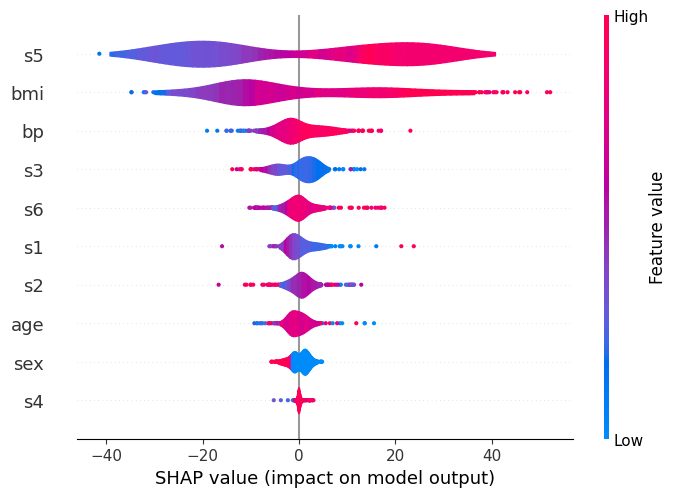

In [5]:
# auto-scaled:
shap.plots.violin(shap_values)

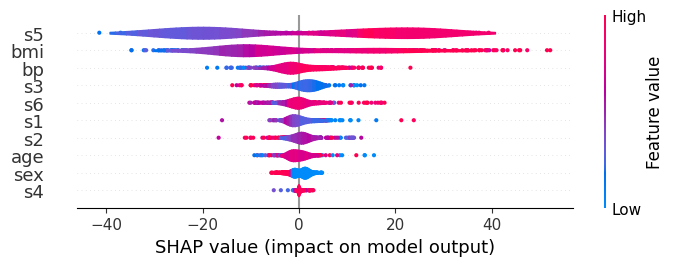

In [6]:
# each plot is 0.1 inches
shap.plots.violin(shap_values, plot_size=0.1)

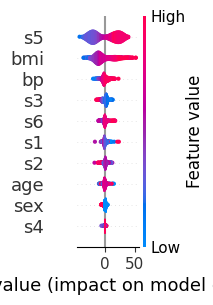

In [7]:
# scale: 1x3 inches
shap.plots.violin(shap_values, plot_size=(1, 3))

<hr>
Have an idea for more helpful examples? Pull requests that add to this documentation notebook are encouraged! 